# Other metrics
Here we study some metrics which don't apply to such tiny scales like visits and sessions.
Fortunately, these metrics don't require definitions of visits and sessions to be made. Simple logs will suffice.

### Setup

In [1]:
import glob
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import pyarrow.feather as feather
import seaborn as sns

%matplotlib inline

In [2]:
FEATHER_PATH = "../../data/2019-Oct.feather"
np.random.seed(101)

In [3]:
%%time
data = feather.read_feather(FEATHER_PATH)

CPU times: user 12.6 s, sys: 7.33 s, total: 20 s
Wall time: 45.5 s


In order to stick to the definitions of the source material, let's rename the 'user_session' field to 'visit_id'.

In [4]:
data.rename(columns = {"user_session":"visit_id"}, inplace=True)
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,visit_id
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,None,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


## Popularity Metrics

### Active Users
We consider a user active if they register at least one log.

### Monthly Active Users
Since we have a month's worth of data, this is the simplest metric to calculate.


In [5]:
print(f"Monthly Active Users (MAU):{data.user_id.nunique()}")

Monthly Active Users (MAU):3022290


### Daily Active Users
We shall plot it as a graph.

In [6]:
data['event_date'] = pd.to_datetime(data['event_time']).dt.date

In [7]:
plot_data = data.groupby('event_date').user_id.nunique().rename("DAU")

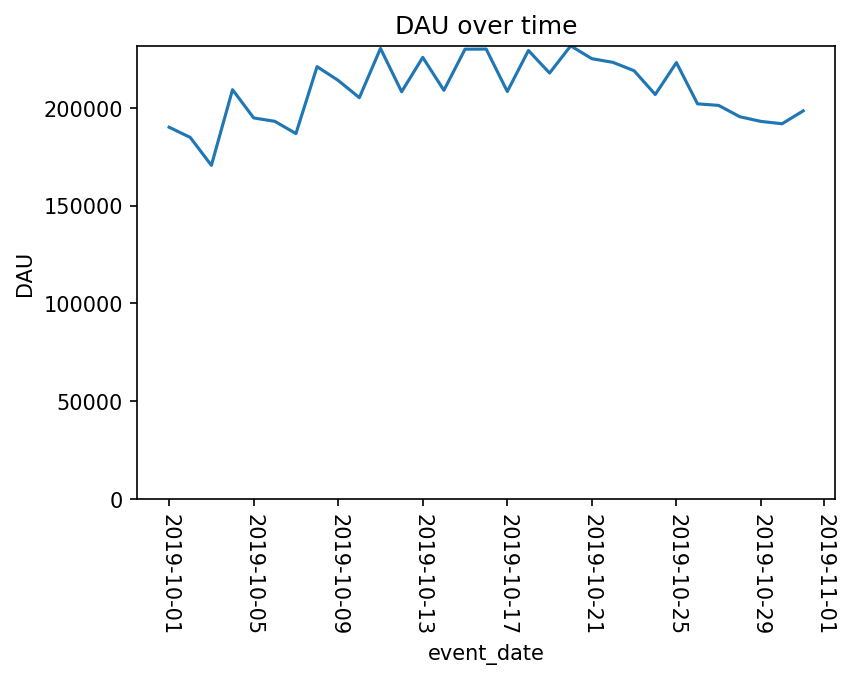

In [8]:
plt.figure(dpi=150)
axes = plt.gca()
axes.set_ylim([0,max(plot_data)])
sns.lineplot(plot_data.index,plot_data)
plt.xticks(rotation = 270) 
plt.title("DAU over")
plt.show()